<a href="https://colab.research.google.com/github/RoHIT4Kr7/100-days-of-code/blob/master/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.7 MB/s eta 0:00:00


In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [16]:
class AgentState(TypedDict):
    name:str
    age: str
    skills:str
    final: str

In [17]:
def first_node(state: AgentState)->AgentState:
  """This is the first node of our sequence"""

  state["final"] = f"{state['name']}, Welcome to the system !"
  return state

In [18]:
def second_node(state: AgentState)->AgentState:
  """This is the second node of our sequence"""

  state["final"] = state["final"] + f" you are {state['age']} years old!"
  return state

In [19]:
def third_node(state: AgentState)->AgentState:
  """This is the third node of our sequence"""

  state["final"] = state["final"] + f" you have skills in {state['skills']}"
  return state

In [20]:
graph = StateGraph(AgentState)

graph.add_node("first", first_node)
graph.add_node("second", second_node)
graph.add_node("third", third_node)


graph.set_entry_point("first")
graph.add_edge("first", "second")
graph.add_edge("second", "third")
graph.set_finish_point("third")
app = graph.compile()

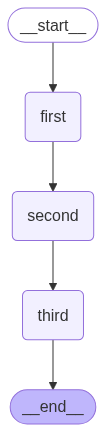

In [21]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
result = app.invoke({"name": "rohit", "age": '22', "skills": "Python, langchain , MERN stack"})
result['final']

'hi rohit ! you are 22 years old! you have skills in Python, langchain , MERN stack'